In [34]:
# Library for manipulating plot shape/size/etc.
library(repr)
# Code for adding error bars to a plot...
source("errorbar.R")

In [35]:
## Load text file with pasted data
data <- read.table("final-cancer-results.txt",header=FALSE)

In [36]:
## Nrows is the number of samples
## Ncolumns is the number of clusters (1 to N)
dim(data)

[1] 100  94

In [37]:
## Calculate the mean -percentage- correct
## We used 10-fold random subsampling validation (10.0)
## Apply the mean() function across the rows (axis 2, one mean per column)
means <- as.vector(apply(data,2,mean)*100.0 / 10.0)

In [38]:
## Raw mean data
means

[1] 13.5 18.7 27.2 24.7 31.7 36.1 40.7 41.8 44.6 41.5 46.1 48.7 49.5 49.1 49.5
[16] 48.9 46.0 45.6 49.2 50.9 49.3 49.0 52.2 50.3 50.6 50.4 51.3 51.5 50.3 52.1
[31] 51.6 51.6 50.4 49.4 52.1 52.9 49.5 50.2 51.5 54.0 51.8 54.0 54.7 50.5 51.5
[46] 53.8 53.1 54.1 50.5 51.3 53.3 53.1 51.5 52.2 54.1 56.0 55.8 54.4 52.3 53.6
[61] 53.0 50.7 57.3 51.4 53.3 54.4 52.5 54.0 51.3 54.5 52.0 52.8 53.4 50.8 54.6
[76] 51.5 51.7 54.6 55.6 51.7 56.0 55.4 53.4 56.8 55.4 53.4 55.0 53.3 55.6 52.5
[91] 55.5 55.0 54.2 54.8

In [39]:
## Standard error is the standard deviation (sd()) / sqrt(N-1)
stderr <- as.vector(apply(data,2,sd)*100.0 / (10.0*sqrt(nrow(data)-1)))

In [40]:
## Raw stderr data
stderr

[1] 0.8963757 1.1662621 1.1786628 1.3956584 1.3780014 1.3161969 1.3571112
 [8] 1.5995357 1.5078612 1.5542104 1.4205842 1.4543701 1.6620690 1.7617216
[15] 1.6310864 1.7076085 1.4982219 1.4520180 1.3603027 1.4988687 1.4087560
[22] 1.6443253 1.4254955 1.4246006 1.6463097 1.4135641 1.3374210 1.6248190
[29] 1.3586140 1.5070152 1.4826136 1.6518781 1.4908489 1.4343434 1.4865654
[36] 1.5271912 1.5343896 1.4705905 1.3877406 1.4913963 1.6435805 1.6098361
[43] 1.4459270 1.5007735 1.4524044 1.4967229 1.3753333 1.4920460 1.4311745
[50] 1.4473376 1.3404691 1.4893082 1.6058700 1.7645282 1.4988687 1.4845392
[57] 1.4926272 1.5340239 1.4835423 1.5220047 1.5218706 1.4515612 1.2924162
[64] 1.5779575 1.4571736 1.5927599 1.4311745 1.4707293 1.4116500 1.3950735
[71] 1.6349913 1.4219123 1.5132648 1.6822352 1.3732917 1.5802513 1.5652003
[78] 1.3880714 1.4729476 1.4917725 1.5385400 1.6061559 1.4442678 1.5310946
[85] 1.5346889 1.5856977 1.5418523 1.5455206 1.4307823 1.4023680 1.6185273
[92] 1.5939125 1.5197237 1.6379840

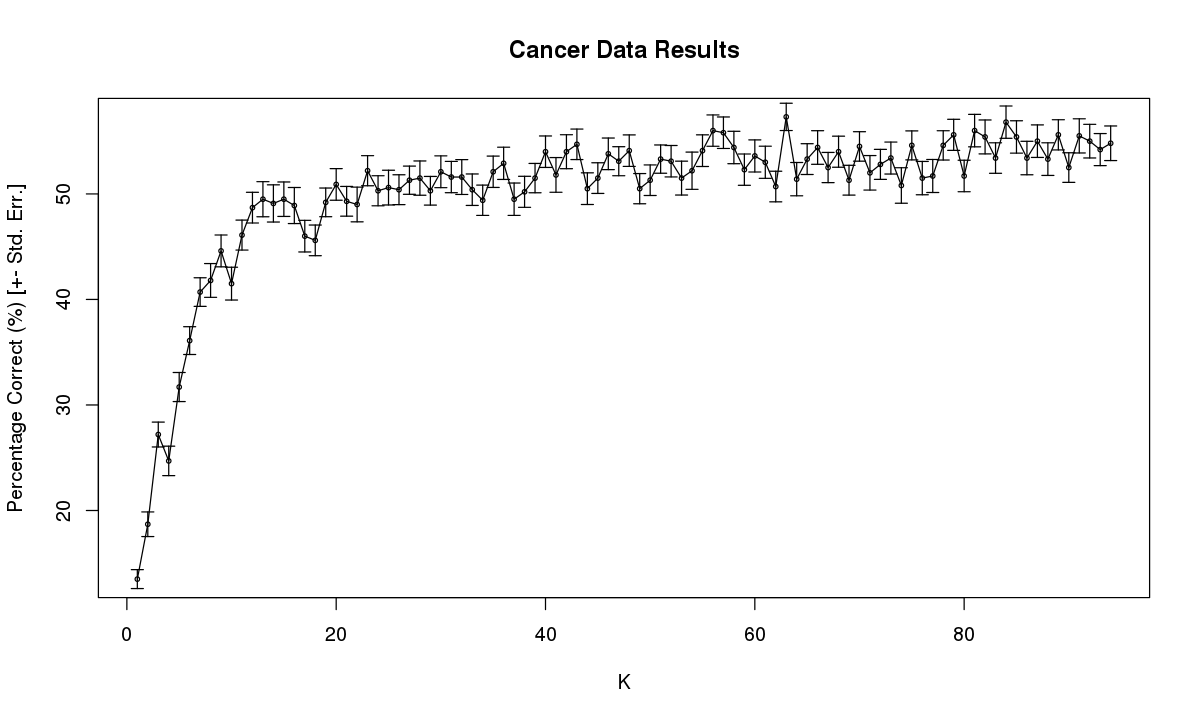

In [41]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot(means,type='o',ylab="Percentage Correct (%) [+- Std. Err.]",xlab="K",cex=0.5,main="Cancer Data Results")
error.bar(seq(1,ncol(data)),means,upper=stderr,length=0.05)